# Load data

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from data_analyze_tool import DataAnalyzer
from sklearn.ensemble import RandomForestClassifier

random_seed = 42
## Fetch data
from ucimlrepo import fetch_ucirepo
# fetch dataset 
uci_data = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = uci_data.data.features 
y = uci_data.data.targets 

le = preprocessing.LabelEncoder()
X = X.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)
y = y.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)


# Drop all columns with NA
X = X.dropna()
y = y.loc[X.index]
# Flatten the y
y = y.values.ravel()


## Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=random_seed)

In [2]:
## Try Random Forest
random_forest_pipeline = RandomForestClassifier(random_state=random_seed, max_depth=6)
random_forest_pipeline.fit(X_train, y_train)

print("Classification Accuracy:\n", random_forest_pipeline.score(X_test, y_test))

Classification Accuracy:
 0.9085173501577287


# Test the Module

In [3]:
data_analyzer = DataAnalyzer(random_forest_pipeline, X, y, task="classification", test_set=True, metric="accuracy", split=0.15, n_cores=10, negative_threshold=-0.000)

No test set provided, auto splitting dataset with test set of 15.00% of the data.
Train Data size, X: (1794, 16), y: (1794,)
Test Data size, X: (317, 16), y: (317,)
Task: classification, using metric: accuracy
Base score: 0.9085173501577287
Using multi threads for computing data influence


In [4]:
data_analyzer.Auto_preprocess()

Analyzing each features


100%|██████████| 16/16 [00:02<00:00,  6.35it/s]

Looking good! All features have positive impact.


In [5]:
data_analyzer.CalculateInfluence(method='LOO',n_random_row=-1)

Calculating all data influence using Leave One Out with parallel computing


100%|██████████| 1794/1794 [00:45<00:00, 39.65it/s]


The data last used: LOO
[ 0.0126183   0.0126183   0.01577287 ...  0.00315457 -0.00315457
 -0.00315457]
Percentage of negative influence data points in data: 2.23%
Average influence: 0.012321126502994571
Most negative influence: -0.009463722397476282 , index: 1241
The data with min influence:
Gender                             1.000000
Age                               19.637947
Height                             1.809101
Weight                            85.000000
family_history_with_overweight     1.000000
FAVC                               1.000000
FCVC                               3.000000
NCP                                3.000000
CAEC                               2.000000
SMOKE                              0.000000
CH2O                               2.229171
SCC                                0.000000
FAF                                1.607953
TUE                                0.628059
CALC                               2.000000
MTRANS                             3.000000
Nam

In [6]:
data_analyzer.PrintInfluence()

The data last used: LOO
[ 0.0126183   0.0126183   0.01577287 ...  0.00315457 -0.00315457
 -0.00315457]
Percentage of negative influence data points in data: 2.23%
Average influence: 0.012321126502994571
Most negative influence: -0.009463722397476282 , index: 1241
The data with min influence:
Gender                             1.000000
Age                               19.637947
Height                             1.809101
Weight                            85.000000
family_history_with_overweight     1.000000
FAVC                               1.000000
FCVC                               3.000000
NCP                                3.000000
CAEC                               2.000000
SMOKE                              0.000000
CH2O                               2.229171
SCC                                0.000000
FAF                                1.607953
TUE                                0.628059
CALC                               2.000000
MTRANS                             3.000000
Nam

Percentage of negative influence data points in data: 2.23%


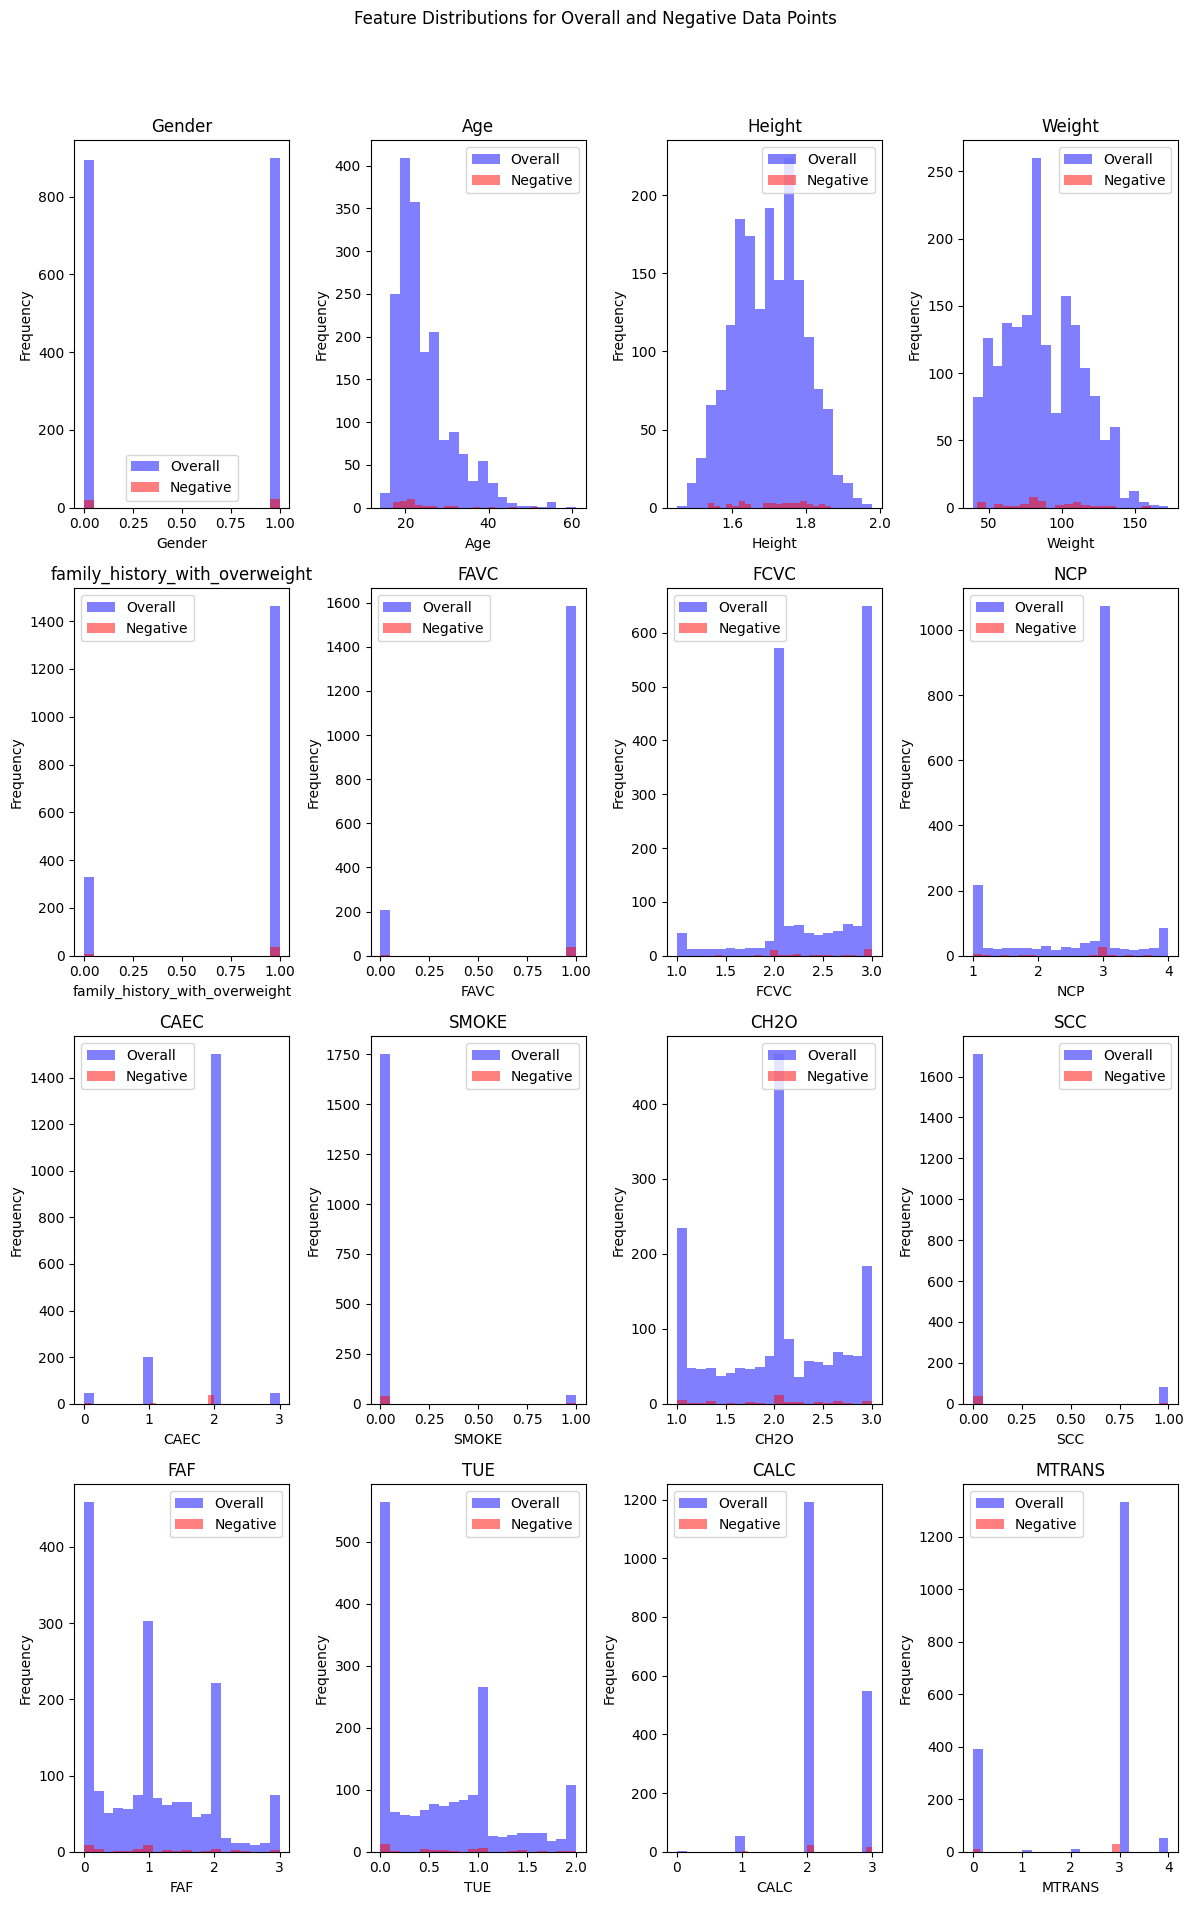

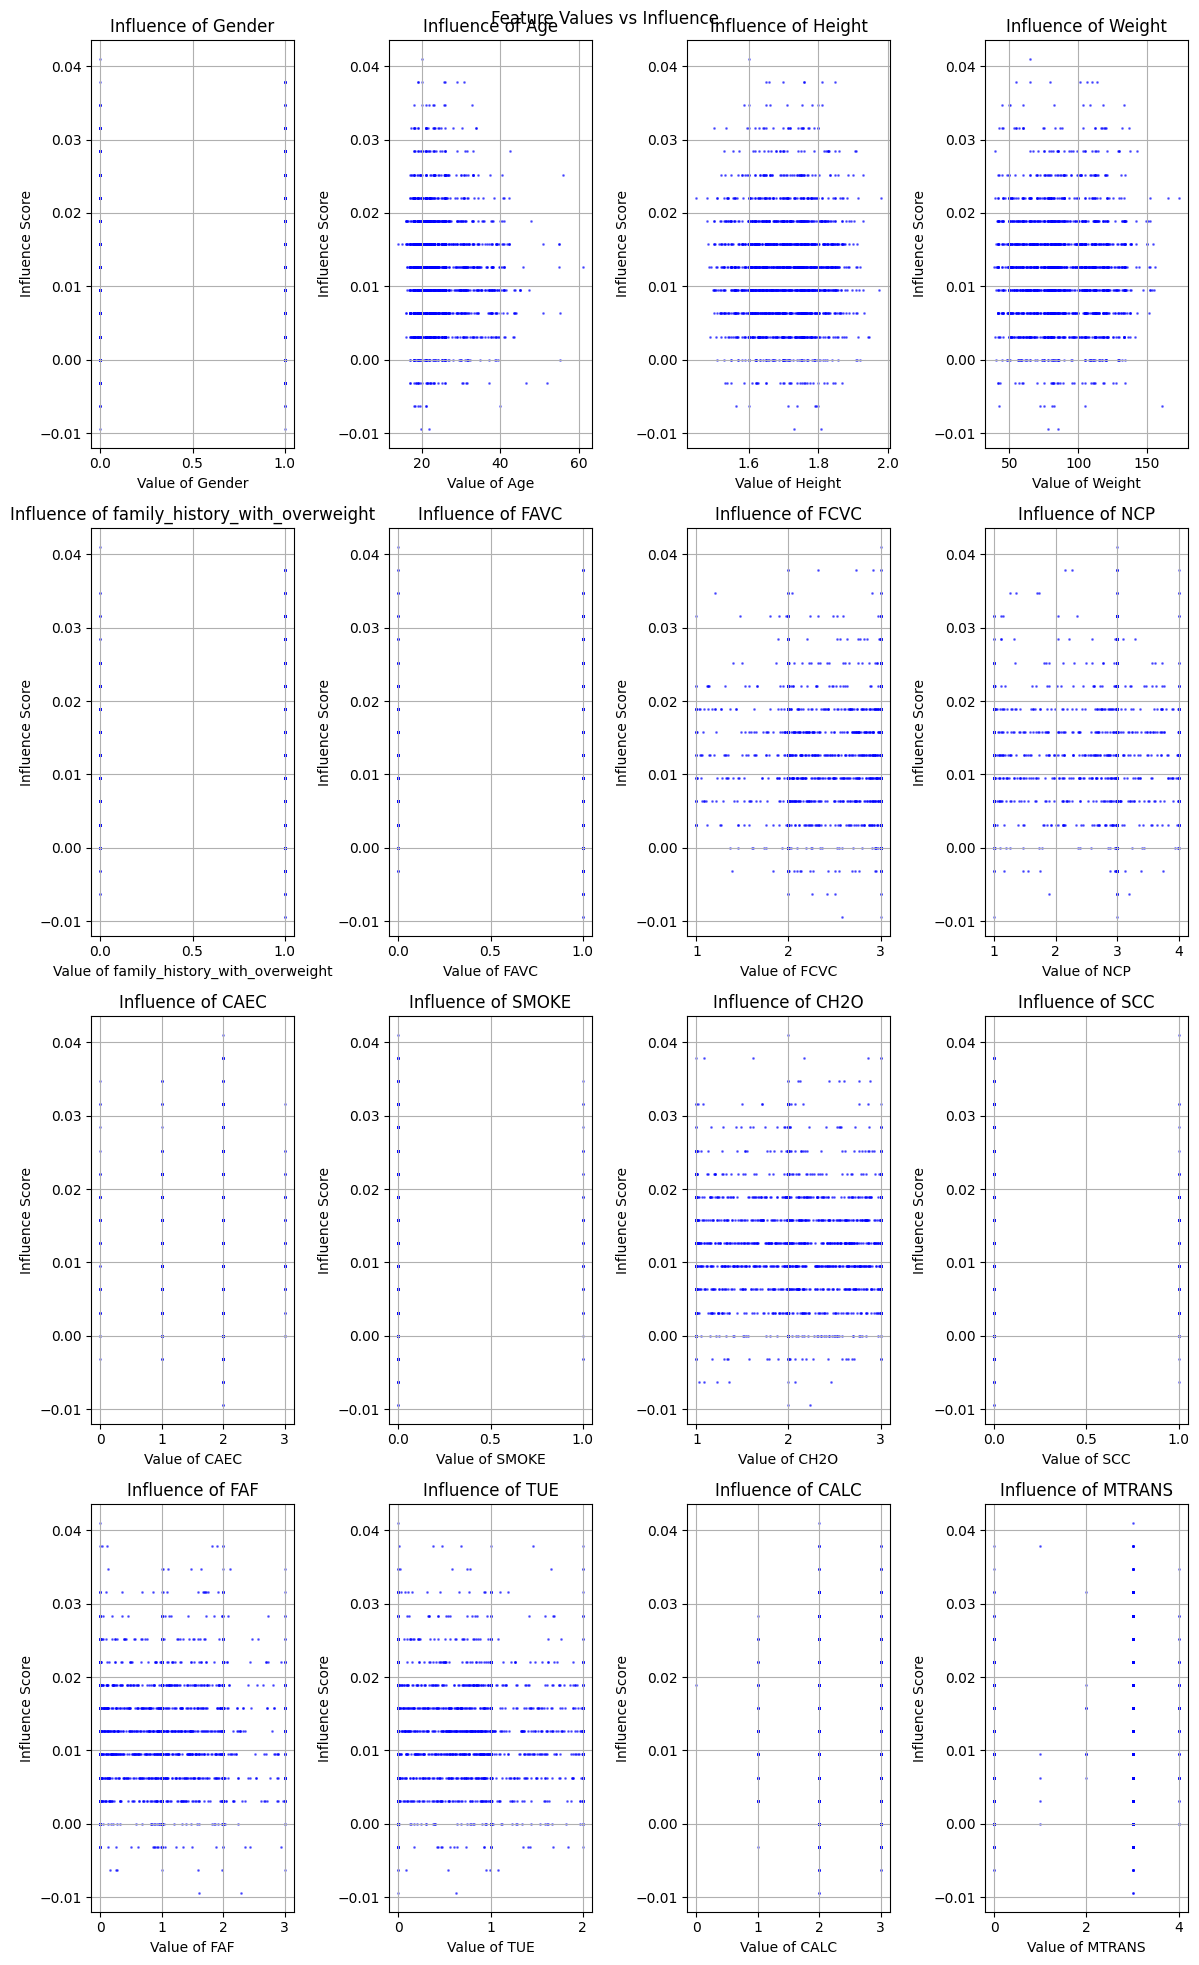

Testing distribution difference for each feature between negative data points and original dataset.
Feature in negative data points: Gender, KS Statistic: 0.023327759197324414, P-value: 1.0
Feature in negative data points: Age, KS Statistic: 0.14952619843924192, P-value: 0.31331096192996044
Feature in negative data points: Height, KS Statistic: 0.1479375696767001, P-value: 0.3253618897720571
Feature in negative data points: Weight, KS Statistic: 0.10652173913043478, P-value: 0.7256109370023104
Feature in negative data points: family_history_with_overweight, KS Statistic: 0.058946488294314384, P-value: 0.9979394886141858
Feature in negative data points: FAVC, KS Statistic: 0.040942028985507244, P-value: 0.9999990012937322
Feature in negative data points: FCVC, KS Statistic: 0.1068283166109253, P-value: 0.7224273155966474
Feature in negative data points: NCP, KS Statistic: 0.0592809364548495, P-value: 0.9977622194753238
Feature in negative data points: CAEC, KS Statistic: 0.0382385730211

In [7]:
data_analyzer.Analyze_data_influence(negative_threshold=0.02)